In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [242]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [243]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [244]:
mi_dc=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals'))].copy()
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')].copy()
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')].copy()
mi_dc.shape,mi.shape,dc.shape

((24, 18), (187, 18), (177, 18))

In [245]:
mi_dcdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals'))].copy()
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')].copy()
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')].copy()
mi_dcdeli.shape,mideli.shape,dcdeli.shape

((5775, 21), (45136, 21), (41383, 21))

In [246]:
mi_dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


In [247]:
mi.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [248]:
dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN


In [249]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,
                        figsize=size)
    
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,
                                           ax=ax[i],
                                           colors=['lightskyblue',
                                                   'bisque'],
                                           autopct='%2.f%%')
        ax[i].set_title(columns[i],
                        fontsize=20)

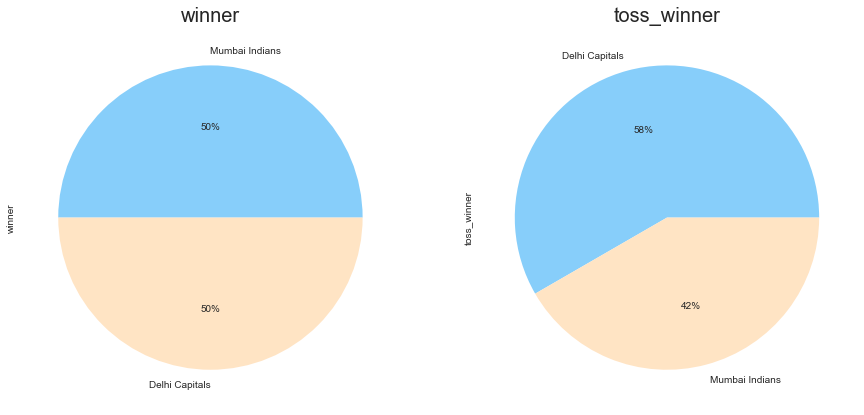

In [250]:
cat_plot(mi_dc,['winner','toss_winner'],(15,8),'pie')

In [251]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,
                        figsize=size)
    
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,
                                           ax=ax[i],
                                           color='silver',
                                           fontsize=13)
        ax[i].set_title(columns[i],
                        fontsize=20)
        

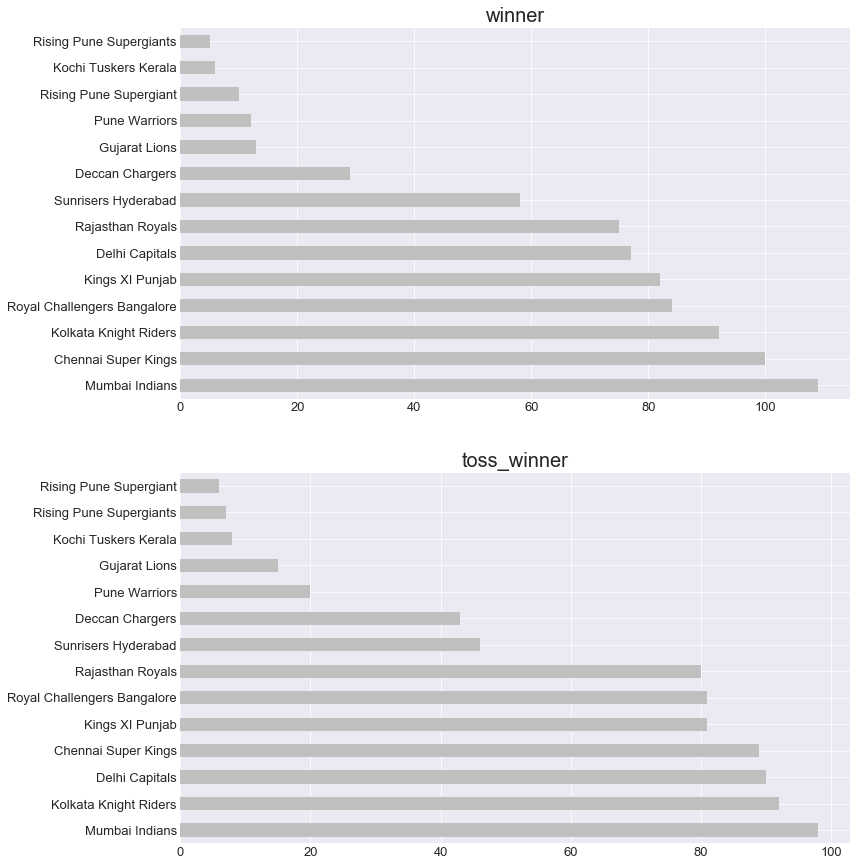

In [252]:
cat_plot(matches,['winner','toss_winner'],(12,15),'barh')


### As the head on data suggests there is 50-50 win chance for both teams and Dc is often a toss winner compared to Mi our first assumption should be that DC has higher chances of winning but if we check the overall wins then MI outshines DC by a heavy margin.

# Q2

In [253]:
power_wicket_loss=mi_dcdeli.query('over<=6').groupby('match_id').player_dismissed.count()
power_wicket_loss.describe()

count    24.000000
mean      3.125000
std       1.676241
min       0.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: player_dismissed, dtype: float64

Text(0.5, 0.98, 'Frequency distribution of wickets lost in the powerplay by both teams')

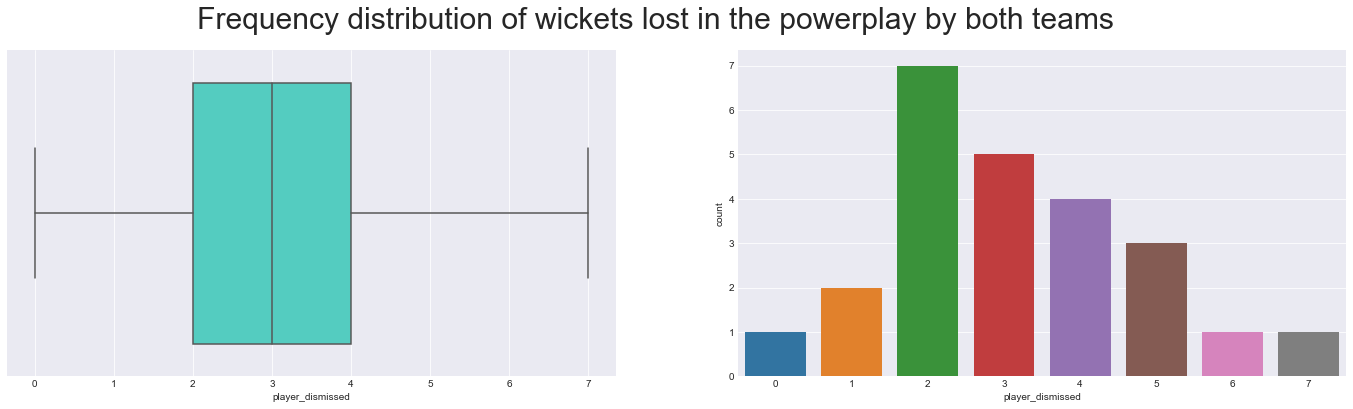

In [254]:
fig,ax=plt.subplots(ncols=2,
                    figsize=(24,6))

sns.boxplot(power_wicket_loss,
            ax=ax[0],
            color='turquoise')

sns.countplot(power_wicket_loss,
              ax=ax[1])
# power_wicket_loss.value_counts().plot.bar()

fig.suptitle('Frequency distribution of wickets lost in the powerplay by both teams',fontsize=30)

### From the above graph we can infer that the wickets will be lost within the range of 2-4

# Q3

In [255]:
boundaries_count=mi_dcdeli.query('batsman_runs>4').groupby(['match_id',
                                                            'bowler']).batsman_runs.count()
boundaries_count

match_id  bowler         
24        CH Morris          2
          Harbhajan Singh    1
          K Rabada           2
          MJ McClenaghan     1
44        A Mishra           4
                            ..
11325     J Yadav            1
          JJ Bumrah          1
          K Paul             3
          K Rabada           1
          SL Malinga         1
Name: batsman_runs, Length: 165, dtype: int64

In [256]:
ecorate_bowlers=mi_dcdeli.groupby(['match_id',
                                   'bowler']).agg({'total_runs':'sum',
                                                   'bye_runs':'sum',
                                                   'legbye_runs':'sum',
                                                   'ball':'count'})
ecorate_bowlers=ecorate_bowlers.merge(boundaries_count,
                      on=['match_id','bowler'],
                      )
ecorate_bowlers.rename({'batsman_runs':'boundaries_count'},
                       inplace=True,
                       axis=1)
# 
ecorate_bowlers=ecorate_bowlers.query('boundaries_count<6 & ball>6')
ecorate_bowlers

total_runs  bye_runs  legbye_runs  ball  \
match_id bowler                                                     
24       CH Morris                33         0            0    25   
         Harbhajan Singh          26         0            0    24   
         K Rabada                 31         0            1    27   
         MJ McClenaghan           25         1            0    25   
44       A Mishra                 38         0            1    24   
...                              ...       ...          ...   ...   
11325    J Yadav                  25         0            0    24   
         JJ Bumrah                20         0            1    24   
         K Paul                   38         0            0    19   
         K Rabada                 42         0            1    26   
         SL Malinga               46         0            4    25   

                          boundaries_count  
match_id bowler                             
24       CH Morris                       2  
         Harbhajan Singh                 1  
         K Rabada                        2  
         MJ McClenaghan                  1  
44       A Mishra                        4  
...                                    ...  
11325    J Yadav                         1  
         JJ Bumrah                       1  
         K Paul                          3  
         K Rabada                        1  
         SL Malinga                      1  

[160 rows x 5 columns]

Text(0.5, 1.0, 'Frequency Distribution of bowlers with economy rate less than 9 having less than 6 boundaries')

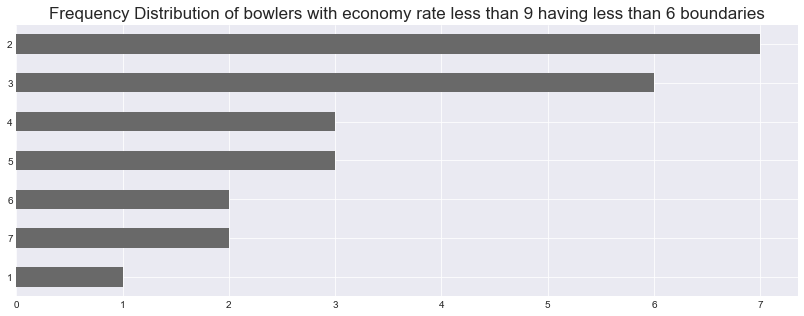

In [257]:
ecorate_bowlers['economy_rate']=(((ecorate_bowlers.total_runs-(ecorate_bowlers.bye_runs+ecorate_bowlers.legbye_runs))/ecorate_bowlers.ball)*6)
ecorate_bowlers.query('economy_rate<9').groupby('match_id').economy_rate.count().value_counts().sort_values().plot.barh(figsize=(14,5),
                                                                                                                        color='dimgray')
plt.title('Frequency Distribution of bowlers with economy rate less than 9 having less than 6 boundaries',fontsize=17)

### As we can determine from the above analysis there will be around 2-3 such bowlers in the match

# Q4

In [258]:
bman_runs30=mi_dcdeli.groupby(['match_id',
                               'batsman']).sum().query('batsman_runs>30').batsman_runs

bman_runs30.describe()

count    84.000000
mean     50.666667
std      15.423604
min      31.000000
25%      37.750000
50%      47.500000
75%      59.000000
max      95.000000
Name: batsman_runs, dtype: float64

Text(0.5, 0.98, 'Frequency distribution of batsmen who will score more than 30 runs in the match')

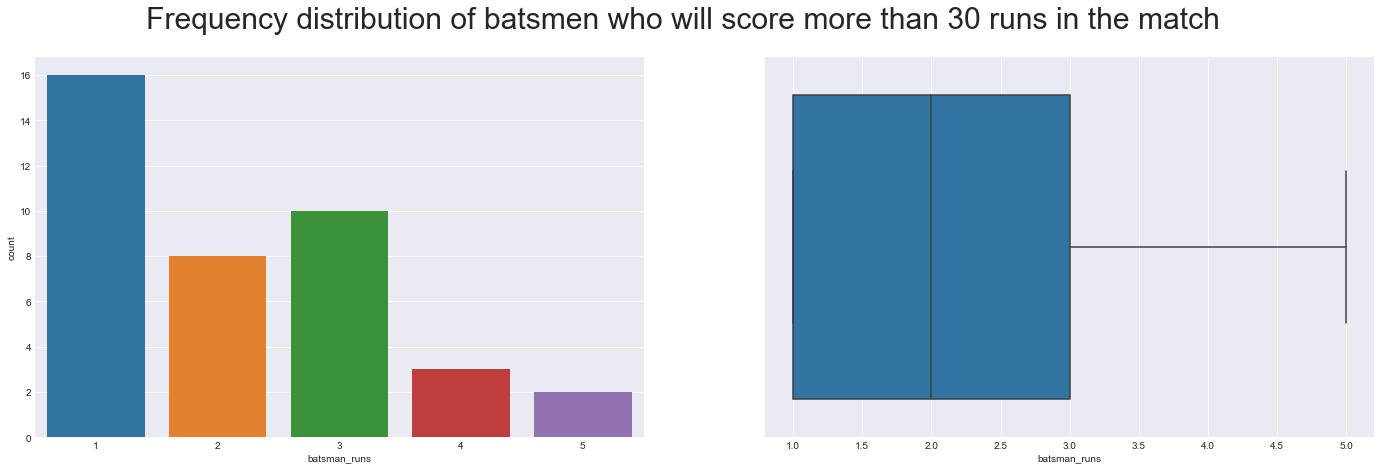

In [259]:
fig,ax=plt.subplots(ncols=2,
                    figsize=(24,7))

sns.countplot(bman_runs30.value_counts(),
              ax=ax[0])

sns.boxplot(bman_runs30.value_counts(),
            ax=ax[1])

fig.suptitle('Frequency distribution of batsmen who will score more than 30 runs in the match',fontsize=30)

### From the above analysis we can determine that there will be 1-3 such batsmen in the match

# Q5

In [260]:

def bumrah_economy(df):
    bumrah_eco=df.query('over>=15')
    bumrah_eco=bumrah_eco[bumrah_eco.bowler.str.contains('JJ Bumrah')].groupby('match_id').agg({'total_runs':'sum',
                                                                                                 'bye_runs':'sum',
                                                                                                 'legbye_runs':'sum',
                                                                                                  'ball':'count'})
    
    return (((bumrah_eco.total_runs-(bumrah_eco.bye_runs+bumrah_eco.legbye_runs))/bumrah_eco.ball)*6)


In [261]:
print('Head on match Data \n\n',bumrah_economy(mi_dcdeli).describe(),'\n\n Overall Data \n\n',bumrah_economy(deliveries).describe())

Head on match Data 

 count    10.000000
mean      8.675000
std       3.829799
min       2.500000
25%       6.375000
50%       8.875000
75%      10.375000
max      15.500000
dtype: float64 

 Overall Data 

 count    71.000000
mean      8.757611
std       3.313204
min       2.500000
25%       6.500000
50%       8.500000
75%      10.500000
max      21.428571
dtype: float64


Text(0.5, 0.98, "Distribution of Bumrah's Economy rate")

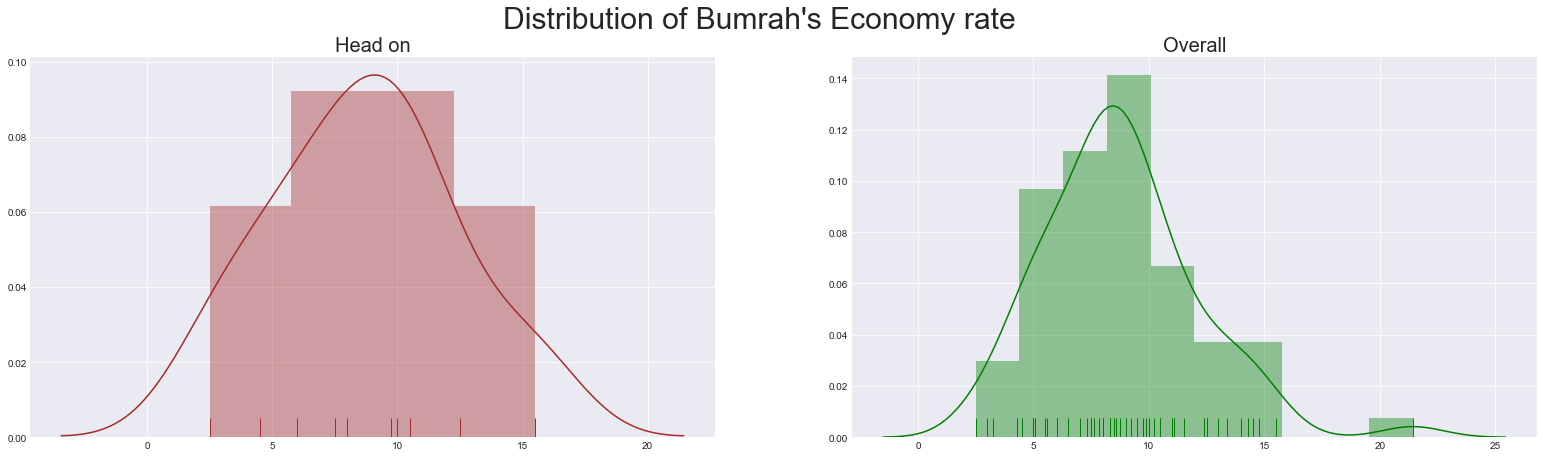

In [262]:
fig,ax=plt.subplots(ncols=2,figsize=(27,7))

sns.distplot(bumrah_economy(mi_dcdeli),
             ax=ax[0],
             color='brown',
             rug=True)
ax[0].set_title('Head on',
            fontsize=20)

sns.distplot(bumrah_economy(deliveries),
             ax=ax[1],
             color='g',
             rug=True)
ax[1].set_title('Overall',
                fontsize=20)

fig.suptitle('Distribution of Bumrah\'s Economy rate',fontsize=30)

### As we can observe from the above distributions Bumrah's economy rate generally lies between 6-11 in head on matches and within 5-10 but taking a closer look at the descriptive stats we can assume that the economy rate will be over 8